In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
path = 'C:/GitHub/SUEWS_DB_Typology_test/Matthew/runs'
# C:\GitHub\SUEWS_DB_Typology_test\Matthew\runs\mcall\output\11_2017_SUEWS_5.txt
ver = '/mcall'
mc_all = pd.read_csv(path + ver + '/output/11_2018_SUEWS_60.txt', sep='\s+')

mc_all['Datetime'] = pd.to_datetime(mc_all[['Year', 'DOY', 'Hour', 'Min']].astype(str).agg('-'.join, axis=1), format='%Y-%j-%H-%M')

# Set the datetime column as the index
mc_all.set_index('Datetime', inplace=True)

ver = '/tnall'
tn_all = pd.read_csv(path + ver + '/output/11_2018_SUEWS_60.txt', sep='\s+')

tn_all['Datetime'] = pd.to_datetime(tn_all[['Year', 'DOY', 'Hour', 'Min']].astype(str).agg('-'.join, axis=1), format='%Y-%j-%H-%M')

# Set the datetime column as the index
tn_all.set_index('Datetime', inplace=True)

ver = '/nfall'
nf_all = pd.read_csv(path + ver + '/output/11_2018_SUEWS_60.txt', sep='\s+')

nf_all['Datetime'] = pd.to_datetime(nf_all[['Year', 'DOY', 'Hour', 'Min']].astype(str).agg('-'.join, axis=1), format='%Y-%j-%H-%M')

# Set the datetime column as the index
nf_all.set_index('Datetime', inplace=True)

ver = '/mpall'
mp_all = pd.read_csv(path + ver + '/output/11_2018_SUEWS_60.txt', sep='\s+')

mp_all['Datetime'] = pd.to_datetime(mp_all[['Year', 'DOY', 'Hour', 'Min']].astype(str).agg('-'.join, axis=1), format='%Y-%j-%H-%M')

# Set the datetime column as the index
mp_all.set_index('Datetime', inplace=True)

# mc_all = mc_all.add_suffix('_mc')
# tn_all = tn_all.add_suffix('_tn')
# mp_all = mp_all.add_suffix('_mp')
# nf_all = nf_all.add_suffix('_nf')


<>:4: SyntaxWarning: invalid escape sequence '\s'
<>:12: SyntaxWarning: invalid escape sequence '\s'
<>:20: SyntaxWarning: invalid escape sequence '\s'
<>:28: SyntaxWarning: invalid escape sequence '\s'
<>:4: SyntaxWarning: invalid escape sequence '\s'
<>:12: SyntaxWarning: invalid escape sequence '\s'
<>:20: SyntaxWarning: invalid escape sequence '\s'
<>:28: SyntaxWarning: invalid escape sequence '\s'
C:\Users\xbacos\AppData\Local\Temp\ipykernel_8672\3171583893.py:4: SyntaxWarning: invalid escape sequence '\s'
  mc_all = pd.read_csv(path + ver + '/output/11_2018_SUEWS_60.txt', sep='\s+')
C:\Users\xbacos\AppData\Local\Temp\ipykernel_8672\3171583893.py:12: SyntaxWarning: invalid escape sequence '\s'
  tn_all = pd.read_csv(path + ver + '/output/11_2018_SUEWS_60.txt', sep='\s+')
C:\Users\xbacos\AppData\Local\Temp\ipykernel_8672\3171583893.py:20: SyntaxWarning: invalid escape sequence '\s'
  nf_all = pd.read_csv(path + ver + '/output/11_2018_SUEWS_60.txt', sep='\s+')
C:\Users\xbacos\AppDat

In [49]:
# a = pd.concat([mp_all, mc_all], axis = 1, join= 'inner')

df_m = pd.concat([mc_all, mp_all, nf_all, tn_all],axis=1,join='inner',keys=['mc','mp', 'nf', 'tn']).swaplevel(0,1,axis=1).sort_index(axis=1)



<Axes: xlabel='Datetime'>

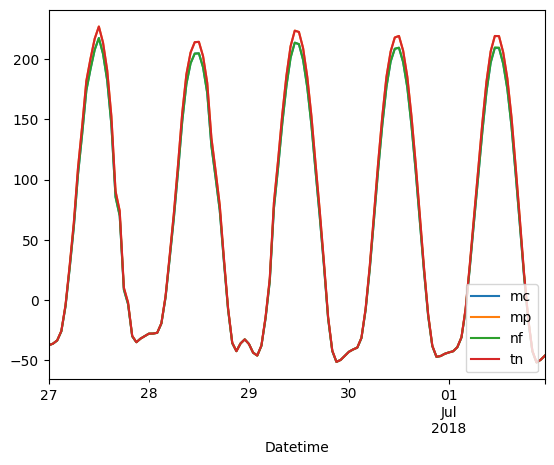

In [61]:
df_m.loc['2018-06-27' : '2018-07-01', 'QS'].plot()

ValueError: 'y1' is not 1-dimensional

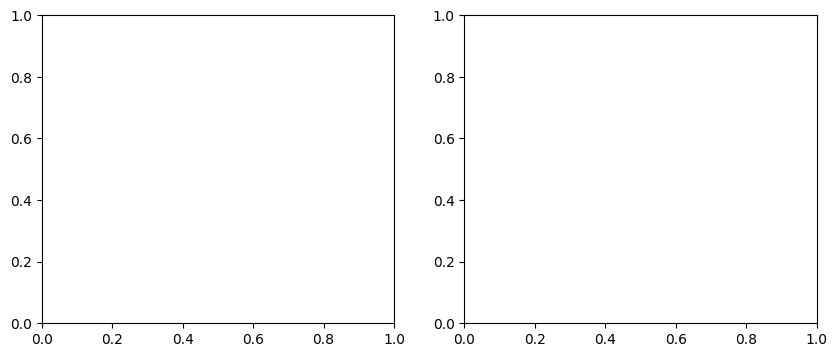

In [75]:
five_minute_means = df_m.loc['2018-01':'2018-08'].resample('60min').mean()

# Ensure the time index is properly formatted
five_minute_means['time'] = five_minute_means.index.strftime('%H:%M')
five_minute_means['time'] = pd.to_datetime(five_minute_means['time'], format='%H:%M')

# Calculate the mean and standard deviation for each 5-minute interval
diurnal_mean = five_minute_means.groupby(five_minute_means['time'].dt.time).mean()
diurnal_std = five_minute_means.groupby(five_minute_means['time'].dt.time).std()

# Convert time to numeric format for plotting
diurnal_mean['time_numeric'] = diurnal_mean.index.map(lambda t: t.hour * 60 + t.minute)
diurnal_std['time_numeric'] = diurnal_std.index.map(lambda t: t.hour * 60 + t.minute)

fig, ax = plt.subplots(1, 2, figsize=(10, 4))


#, 'QS', 'QE', 'QH']
#colors = ['tab:blue', 'tab:purple', 'tab:orange', 'tab:green', 'tab:red']

# Plottingi])
for var in ['QS', 'QH']:
    ax[i].fill_between(diurnal_mean['time_numeric'], diurnal_mean[var] - diurnal_std[var], diurnal_mean[var] + diurnal_std[var], alpha=0.25)
    ax[i].set_title(var, fontweight='bold') 


In [76]:
round(diurnal_mean['QH'], 2)

,mc,mp,nf,tn
time,,,,
00:00:00,20.75,20.75,20.74,20.75
01:00:00,16.48,16.47,16.46,16.47
02:00:00,13.48,13.48,13.46,13.48
03:00:00,15.28,15.33,15.25,15.33
04:00:00,26.81,27.13,26.77,27.13
05:00:00,49.96,50.87,49.90,50.87
06:00:00,82.07,83.91,81.98,83.91
07:00:00,120.43,123.47,120.32,123.47
08:00:00,161.95,166.32,161.81,166.32
